<a href="https://colab.research.google.com/github/eviidoe/project2/blob/main/TitanicDisaster_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Titanic Disaster Predictions`**

#Data Exploration

---



---



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
      

from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.Survived = df.Survived.astype('category')
df.Pclass = df.Pclass.astype('category')
df.PassengerId = df.PassengerId.astype('category')

In [ ]:
df[['Survived', 'Sex']].groupby(['Survived'])['Sex'].value_counts()
df[['Survived', 'Pclass']].groupby(['Survived'])['Pclass'].value_counts()
df[['Survived', 'Embarked']].groupby(['Survived'])['Embarked'].value_counts()
df[['Survived', 'Parch']].groupby(['Survived'])['Parch'].value_counts()

Survived  Parch
0         0        445
          1         53
          2         40
          4          4
          5          4
          3          2
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: Parch, dtype: int64


# Feature Importance

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df.loc[df.Sex == 'female', 'Male'] = False
df.loc[df.Sex == 'male', 'Male'] = True

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='RdYlGn')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Male            object
dtype: object

In [ ]:
df.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
df.loc[df.Sex == 'female', 'Sex'] = False
df.loc[df.Sex == 'male', 'Sex'] = True

In [ ]:
df = df[['Pclass', 'Survived', 'Sex', 'Fare', 'Parch']]

In [ ]:
df.corr(method='pearson')

,Pclass,Survived,Fare,Parch
Pclass,1.000000,-0.338481,-0.549500,0.018443
Survived,-0.338481,1.000000,0.257307,0.081629
Fare,-0.549500,0.257307,1.000000,0.216225
Parch,0.018443,0.081629,0.216225,1.000000


In [ ]:
df.corr()

,Pclass,Survived,Fare,Parch
Pclass,1.000000,-0.338481,-0.549500,0.018443
Survived,-0.338481,1.000000,0.257307,0.081629
Fare,-0.549500,0.257307,1.000000,0.216225
Parch,0.018443,0.081629,0.216225,1.000000


In [ ]:
#sns.scatterplot(x = 'Age', y = 'Fare', data = df)

In [ ]:
#df.Age = df.Age.fillna(df.Age.mean())

In [ ]:
X = df.drop(columns = ['Survived'])
y = df.Survived

In [ ]:
df.isnull().sum()

Pclass      0
Survived    0
Sex         0
Fare        0
Parch       0
dtype: int64

In [ ]:
df.dtypes

Pclass        int64
Survived      int64
Sex          object
Fare        float64
Parch         int64
dtype: object

https://stackoverflow.com/questions/49170296/scikit-learn-feature-importance-calculation-in-decision-trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_graphviz
from sklearn.feature_selection import mutual_info_classif
from sklearn import tree


clf = DecisionTreeClassifier()
clf.fit(X, y)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)

print("feat importance = " + str(feat_importance));

feat importance = [0.03980283 0.13964796 0.14771936 0.02821824]


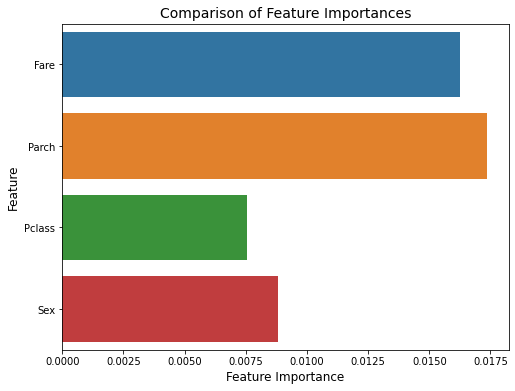

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

y = df['Survived']
#  sort by column names
X = df.drop(['Survived'], axis=1).sort_index(axis=1)

# Building the model 
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 3) 
# Training the model 
extra_tree_forest.fit(X, y) 
# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0) 

# Plot - compare feature importance
plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance_normalized,y=X.columns)
plt.xlabel('Feature Importance',fontsize=12)
plt.ylabel('Feature',fontsize=12)
plt.title('Comparison of Feature Importances', fontsize=14)
plt.show()

**Feature Importance**

Pclass = 0.03980283 

Male = 0.13964796 

Fare = 0.15073938 

Parch = 0.02519822

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_feat = pd.DataFrame({'Feature importance': [0.15, 0.13, 0.03, 0.02]})
df_feat.index = ['Fare', 'Sex', 'Pclass', 'Parch']
print(df_feat)

        Feature importance
Fare                  0.15
Sex                   0.13
Pclass                0.03
Parch                 0.02


In [ ]:
#paretodiagram with future importance

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

df_feat = pd.DataFrame({'feature importance': [0.15, 0.13, 0.03, 0.02]})
df_feat.index = ['Fare', 'Male', 'Pclass', 'Parch']
df = df.sort_values(by='feature importance',ascending=False)
df["cumpercentage"] = df["feature importance"].cumsum()/df["feature importance"].sum()*100


fig, ax = plt.subplots()
ax.bar(df.index, df["feature importance"], color="C0")
ax2 = ax.twinx()
ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

KeyError: ignored

In [ ]:
X.columns

In [ ]:
tree.export_graphviz(dtree, feature_names = X.columns)
from graphviz import Source
Source(tree.export_graphviz(dtree, feature_names = X.columns))

#Modelling


## DT

In [ ]:
df = df[['Pclass', 'Survived', 'Fare', 'Sex', 'Parch']]
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [ ]:
df

,Pclass,Survived,Male,Fare,Parch
0,3,0,True,7.2500,0
1,1,1,False,71.2833,0
2,3,1,False,7.9250,0
3,1,1,False,53.1000,0
4,3,0,True,8.0500,0
...,...,...,...,...,...
886,2,0,True,13.0000,0
887,1,1,False,30.0000,0
888,3,0,False,23.4500,2
889,1,1,True,30.0000,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred =  dtree.predict(X_test)

In [ ]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [ ]:
accuracy_score(y_test, y_pred)

0.8044692737430168

## RF




In [ ]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred =  rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8100558659217877

In [ ]:
X_test

In [ ]:
y_pred

In [ ]:
test = test.drop(columns = ['Name', 'Ticket', 'Cabin'])

In [ ]:
#test = pd.get_dummies(test)
test.Age = test.Age.fillna(test.Age.mean())
test.Fare = test.Fare.fillna(test.Fare.mean())

In [ ]:
rf.predict(test)

# Kaggle Tutorial

In [ ]:
df_train = pd.read_csv('/content/train.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test = pd.read_csv("/content/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = df_train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
print(predictions)
#output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
#output.to_csv('my_submission.csv', index=False)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
